In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
#Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp '/content/drive/My Drive/Colab Notebooks/9. Data Augmentation/cifar-10-python.tar.gz' '/content/cifar-10-batches-py.tar.gz'

In [4]:
!mkdir ~/.keras/datasets

mkdir: cannot create directory ‘/root/.keras/datasets’: File exists


In [0]:
!cp '/content/cifar-10-batches-py.tar.gz' ~/.keras/datasets/

In [6]:
ls ~/.keras/datasets

cifar-10-batches-py/  cifar-10-batches-py.tar.gz


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [8]:
from skimage import io
from keras.models import load_model

model = load_model('/content/drive/My Drive/Colab Notebooks/9. Data Augmentation/6B_model_accuracy_WithCutOut.best.hdf5')

W0711 12:55:01.263494 140259302397824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 12:55:01.285227 140259302397824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 12:55:01.312914 140259302397824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 12:55:01.313901 140259302397824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0711 12:55:01.315114 140259302

In [0]:
images = []
images.append(test_features[18])
images.append(test_features[78])
images.append(test_features[98])
images.append(test_features[2238])

5
(?, 7, 7, 64)
(64,)
(7, 7, 64)
(7, 7)


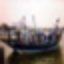

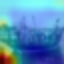

5
(?, 7, 7, 64)
(64,)
(7, 7, 64)
(7, 7)


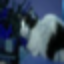

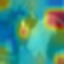

5
(?, 7, 7, 64)
(64,)
(7, 7, 64)
(7, 7)


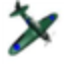

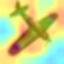

1
(?, 7, 7, 64)
(64,)
(7, 7, 64)
(7, 7)


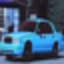

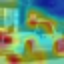

In [11]:
# plane = io.imread("https://akm-img-a-in.tosshub.com/indiatoday/images/story/201903/boeing_737_grounded_1_0.jpeg?VF5mXI2.1l69UuNVL6e_lXRv9HludsBV")
for index in range(len(images)):
  img = images[index]
  img = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  print(class_idx)
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv8")

  import keras.backend as K
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  print(grads.shape)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  print(pooled_grads.shape)
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(9):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis = -1)
  print(conv_layer_output_value.shape)
  print(heatmap.shape)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
  from google.colab.patches import cv2_imshow
  img = cv2.resize(img, (64, 64))
  superimposed_img = cv2.resize(superimposed_img, (64, 64))
  cv2_imshow(img)
  cv2_imshow(superimposed_img)
